## Вводим все данные и библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
RAND_STATE = 42

In [3]:
data = pd.read_csv('disease_train.csv')
public_test = pd.read_csv('disease_public_test.csv')

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,Y
0,2.0,2.0,29.4,84.0,2.0,75.0,5.78,0
1,1.0,2.0,33.5,101.0,2.0,64.0,8.74,0
2,1.0,2.0,29.2,101.0,2.0,80.0,9.72,0
3,1.0,2.0,28.7,121.0,2.0,146.0,3.83,0
4,1.0,1.0,25.6,87.0,2.0,82.0,13.90,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595 entries, 0 to 1594
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1595 non-null   float64
 1   X2      1595 non-null   float64
 2   X3      1595 non-null   float64
 3   X4      1595 non-null   float64
 4   X5      1595 non-null   float64
 5   X6      1595 non-null   float64
 6   X7      1595 non-null   float64
 7   Y       1595 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 99.8 KB


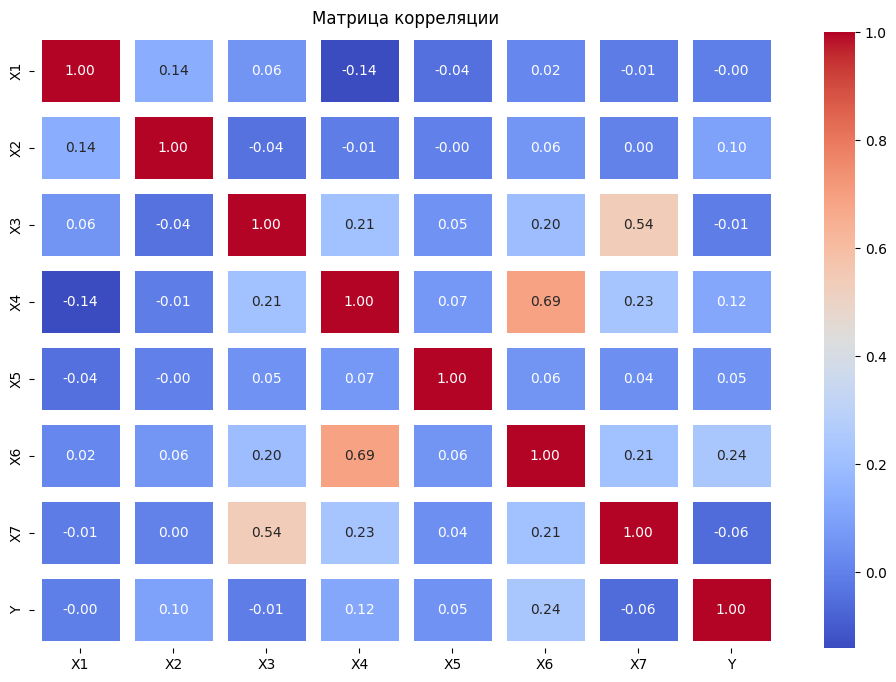

In [6]:
correlation_matrix = data.corr()

# Визуализируем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=10.5)
plt.title('Матрица корреляции')
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

y = data['Y'].copy()

X = data.drop(['Y'],axis = 1)

Важным моментом является стратификация тестового и обучающего множества, т.к. классы таргета не сбалансированы

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=RAND_STATE, stratify=y)

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
import xgboost

## Тест буста со всеми фичами и поиском параметров через gridSearch
    кросс валидация с применением gridsearch без стратификация выдает не особо правильные показатели, т. к. фолды разибиваются без учета несбалансированности классов 

In [35]:
param_grid = {
    'n_estimators': np.arange(200,1000,200),
    'max_depth': np.arange(7,18,2),
    #'eta': [0.3],
    #'gamma': np.arange(0,5,1),
    #'min_child_weight': np.arange(0,10,2),
    'lambda': np.arange(0,10,2),
    #'alpha': np.arange(0,10,2),
    #'max_leaves': np.arange(0,3,1)
    }

In [ ]:
param_grid = {
    'n_estimators': np.arange(200,1000,200),
    'max_depth': np.arange(7,18,2),
    'eta': np.arange(0,1,0.1),
    'lambda': np.arange(0,10,2),
    'alpha': np.arange(0,10,2),
    'n_jobs': np.arange(0,5,2),
    }

In [ ]:
param_grid = {
    'n_estimators': np.arange(200,800,200),
    'max_depth': np.arange(4,18,2),
    'eta': np.arange(0,1,0.1),
    'lambda': np.arange(0,10,2),
    'alpha': np.arange(0,10,2)
    }

In [ ]:
param_grid = {
    'alpha': np.arange(0,5,1),#'alpha': [4], 
    'eta': [0.8], 
    'lambda': np.arange(0,7,1),#'lambda': [2], 
    'max_depth': np.arange(4,18,2),#'max_depth': [8], 
    'n_estimators': [200],
    'max_delta_step': np.arange(0,10,1), #'max_delta_step': 0.
    'subsample': np.arange(0.1,1,0.1)
    }

In [97]:
param_grid = {
    'alpha': np.arange(0,5,1),#'alpha': [4], 
    'eta': [0,0.2,0.5,0.8,1], #'eta': np.arange(0,1,0.2), #
    'lambda': np.arange(0,7,1),#'lambda': [2], 
    'max_depth': np.arange(4,10,2),#'max_depth': [8], 
    'n_estimators': np.arange(200,800,200),
    'max_delta_step': [0,1,5,10], #'max_delta_step': 0.
    'subsample': [0.1,0.3,0.5,0.8,1]
    }

model = xgboost.XGBClassifier()
CV_model = GridSearchCV(model, param_grid=param_grid, n_jobs=-1,
                                   cv=5, scoring='f1_macro')

CV_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'alpha': array([0, 1, 2, 3, 4]),
                         'eta': [0, 0.2, 0.5, 0.8, 1],
                         'lambda': array([0, 1, 2, 3, 4, 5, 6]),
                         'max_delta_step': [0, 1, 5, 10],
                         'max_depth': array([4, 6, 8]),
                         'n_estimators': array([200, 400, 600]),
                         'subsample': [0.1, 0.3, 0.5, 0.8, 1]},
             scoring='f1_macro')

Оптимальные: {'alpha': 3, 
 'eta': 1, 
 'lambda': 5, 
 'max_delta_step': 5, 
 'max_depth': 4, 
 'n_estimators': 200, 
 'subsample': 0.8} 
 
 Дают 0.6546897895460377 на тренировочной, 
     и 0.5360774818401937 на тестовой

In [98]:
CV_model.best_score_

0.6546897895460377

In [99]:
CV_model.best_params_ #0.6546897895460377 на тренировочной, 
                      #0.5360774818401937 на тестовой

{'alpha': 3,
 'eta': 1,
 'lambda': 5,
 'max_delta_step': 5,
 'max_depth': 4,
 'n_estimators': 200,
 'subsample': 0.8}

In [115]:
imp = CV_model.best_estimator_.feature_importances_

In [101]:
pd.Series(index=data.columns[data.columns != 'Y'], data = imp).sort_values()

X5    0.123488
X1    0.124256
X4    0.132326
X3    0.137377
X7    0.143524
X2    0.157449
X6    0.181579
dtype: float32

In [102]:
best_model = CV_model.best_estimator_
best_model #параметры наилучшей модели

XGBClassifier(alpha=3, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None, lambda=5,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=5, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200, ...)

In [113]:
our_model = best_model.fit(X_train, y_train)

In [114]:
from sklearn.metrics import f1_score

y_pred = our_model.predict(X_test)
print(f1_score(y_test, y_pred, average='macro'))

0.5360774818401937


## Тест разных бустингов при удалении одной из фичей
Спойлер - улучшилось не на много

In [ ]:
for i in data.columns:
    if i!= 'Y':
        print('Deleted column=', i)
        y = data['Y'].copy()
        X = data.drop([i,'Y'],axis = 1)
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=RAND_STATE)

        param_grid = {
            'max_depth': np.arange(4,10,2),#'max_depth': [8], 
            'n_estimators': np.arange(200,800,200)
            }
        model = xgboost.XGBClassifier()
        CV_model = GridSearchCV(model, param_grid=param_grid, n_jobs=-1,
                                   cv=5, scoring='f1_macro')
        CV_model.fit(X_train, y_train)
        print('Best Score=',CV_model.best_score_)
        print('Best params=',CV_model.best_params_)

        imp = CV_model.best_estimator_.feature_importances_
        data2 = data.drop(['Y',i],axis = 1)
        print(pd.Series(index=data2.columns, data = imp).sort_values())

## Подбор параметров бустинга без фичи X1

In [47]:
y = data['Y'].copy()
X = data.drop(['X1','X5','Y'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=RAND_STATE, stratify=y)

In [21]:
param_grid = {
    'alpha': np.arange(0,5,1),#'alpha': [4], 
    'eta': [0,0.2,0.5,0.8,1], #'eta': np.arange(0,1,0.2), #
    'lambda': np.arange(0,7,1),#'lambda': [2], 
    'max_depth': np.arange(4,10,2),#'max_depth': [8], 
    'n_estimators': np.arange(200,800,200),
    'max_delta_step': [0,1,5,10], #'max_delta_step': 0.
    'subsample': [0.1,0.3,0.5,0.8,1]
    }

model = xgboost.XGBClassifier()
CV_model = GridSearchCV(model, param_grid=param_grid, n_jobs=-1,
                                   cv=5, scoring='f1_macro')

CV_model.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'alpha': array([0, 1, 2, 3, 4]),
                         'eta': [0, 0.2, 0.5, 0.8, 1],
                         'lambda': array([0, 1, 2, 3, 4, 5, 6]),
                         'max_delta_step': [0, 1, 5, 10],
                         'max_depth': array([4, 6, 8]),
                         'n_estimators': array([200, 400, 600]),
                         'subsample': [0.1, 0.3, 0.5, 0.8, 1]},
             scoring='f1_macro')

In [22]:
CV_model.best_score_

0.6423495526661662

In [23]:
CV_model.best_params_ #0.6423495526661662 на тренировочной, 
                      #0.5306101397699727 на тестовой
                      #без фичи X1 и X5
                      # ХУЖЕ ЧЕМ ТОЛЬКО БЕЗ X1

{'alpha': 4,
 'eta': 1,
 'lambda': 1,
 'max_delta_step': 0,
 'max_depth': 8,
 'n_estimators': 400,
 'subsample': 0.3}

In [154]:
CV_model.best_params_ #0.6427159198327582 на тренировочной, 
                      #0.5401167168674699 на тестовой
                      #без фичи X1

{'alpha': 4,
 'eta': 1,
 'lambda': 5,
 'max_delta_step': 5,
 'max_depth': 8,
 'n_estimators': 400,
 'subsample': 0.3}

In [155]:
imp = CV_model.best_estimator_.feature_importances_

In [24]:
bst_mdl = xgboost.XGBClassifier(reg_alpha= 4,
 eta= 1,
 reg_lambda= 1,
 max_delta_step= 0,
 max_depth= 8,
 n_estimators= 400,
 subsample= 0.3)

In [25]:
our_model = bst_mdl.fit(X_train, y_train)

In [26]:
imp = our_model.feature_importances_

In [29]:
data2 = data.drop(['X5','X1','Y'],axis = 1)

In [30]:
pd.Series(index=data2.columns, data = imp).sort_values()

X2    0.177108
X3    0.190469
X4    0.208723
X6    0.211651
X7    0.212049
dtype: float32

In [31]:
from sklearn.metrics import f1_score

y_pred = our_model.predict(X_test)
print(f1_score(y_test, y_pred, average='macro'))

0.5306101397699727


## подбор наилучших параметров бустинга используя stratifiedKFold


In [12]:
y = data['Y'].copy()

X = data.drop(['X1','Y'],axis = 1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=RAND_STATE, stratify=y)

In [14]:
from sklearn.model_selection import StratifiedKFold

In [15]:
param_grid = {
    'alpha': np.arange(0,5,1),#'alpha': [4], 
    'eta': [0,0.2,0.5,0.8,1], #'eta': np.arange(0,1,0.2), #
    'lambda': np.arange(0,7,1),#'lambda': [2], 
    'max_depth': np.arange(4,10,2),#'max_depth': [8], 
    'n_estimators': np.arange(200,800,200),
    'max_delta_step': [0,1,5,10], #'max_delta_step': 0.
    'subsample': [0.1,0.3,0.5,0.8,1]
    }

In [16]:
cv = StratifiedKFold(n_splits=5, random_state=RAND_STATE, shuffle=True)

In [17]:
X

,X2,X3,X4,X5,X6,X7
0,2.0,29.4,84.0,2.0,75.0,5.78
1,2.0,33.5,101.0,2.0,64.0,8.74
2,2.0,29.2,101.0,2.0,80.0,9.72
3,2.0,28.7,121.0,2.0,146.0,3.83
4,1.0,25.6,87.0,2.0,82.0,13.90
...,...,...,...,...,...,...
1590,2.0,40.5,99.0,2.0,97.0,18.17
1591,2.0,20.1,92.0,2.0,81.0,7.77
1592,1.0,31.9,90.0,2.0,89.0,37.67
1593,2.0,29.8,100.0,2.0,69.0,11.11


In [18]:
model = xgboost.XGBClassifier(random_state=RAND_STATE)
CV_model = GridSearchCV(model, param_grid=param_grid, n_jobs=-1,
                                   cv=cv, scoring='f1_macro')

CV_model.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_typ...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'alpha': array([0, 1, 2, 3, 4]),
                         'eta': [0, 0.2, 0.5, 0.8, 1],
                         'lambda': array([0, 1, 2, 3, 4, 5, 6]),
                         'max_delta_step': [0, 1, 5, 10],
                         'max_depth': array([4, 6, 8]),
                         'n_estimators': array([200, 400, 600]),
                         'subsample': [0.1, 0.3, 0.5, 0.8, 1]},
             scoring='f1_macro')

In [19]:
CV_model.best_score_

0.6104046595168326

In [20]:
CV_model.best_params_ 

{'alpha': 4,
 'eta': 0.8,
 'lambda': 3,
 'max_delta_step': 0,
 'max_depth': 4,
 'n_estimators': 600,
 'subsample': 0.1}

In [80]:
imp = CV_model.best_estimator_.feature_importances_

In [21]:
best_model = CV_model.best_estimator_
best_model #параметры наилучшей модели

XGBClassifier(alpha=4, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.8, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None, lambda=3,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=0, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=600, ...)

In [22]:
our_model = best_model.fit(X_train, y_train)

In [23]:
from sklearn.metrics import f1_score

y_pred = our_model.predict(X_test)
print(f1_score(y_test, y_pred, average='macro'))

0.5613553113553114


Без фичи X1 и X5: 0.6230208869410938 на обучающем, 0.5519456223497131 на тестовом 

параметры модели: {'alpha': 3,
 'eta': 0.8,
 'lambda': 5,
 'max_delta_step': 0,
 'max_depth': 4,
 'n_estimators': 400,
 'subsample': 0.1}

 со всеми фичами: 0.6198386598397387 на обучающем, 0.5852033132530121 на тестовом 

 параметры модели: {'alpha': 3,
 'eta': 0.8,
 'lambda': 6,
 'max_delta_step': 1,
 'max_depth': 8,
 'n_estimators': 200,
 'subsample': 0.5}

 без фичи X1: 0.6104046595168326 на обучающем, 0.5613553113553114 на тестовом 

  параметры модели: {'alpha': 4,
 'eta': 0.8,
 'lambda': 3,
 'max_delta_step': 0,
 'max_depth': 4,
 'n_estimators': 600,
 'subsample': 0.1}

## Обучение лучшей модели

In [25]:
# лучшие параметры для модели использующей все фичи X1-X7
best_params = {'alpha': 3,
 'eta': 0.8,
 'lambda': 6,
 'max_delta_step': 1,
 'max_depth': 8,
 'n_estimators': 200,
 'subsample': 0.5}

In [31]:
XGBClass_model = xgboost.XGBClassifier(random_state=RAND_STATE, **best_params)
XGBClass_model #параметры наилучшей модели

XGBClassifier(alpha=3, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.8, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None, lambda=6,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=1, max_depth=8,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200, ...)

In [32]:
learned_model = XGBClass_model.fit(X_train, y_train)

In [34]:
from sklearn.metrics import f1_score

y_pred = learned_model.predict(X_test)
print(f1_score(y_test, y_pred, average='macro'))

0.5852033132530121


## Предсказание на тестовом множестве

In [37]:
public_test.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'], dtype='object')

In [41]:
X = public_test.copy()

In [42]:
y_pred = learned_model.predict(X)

In [45]:
new_pred = public_test.copy()
new_pred['Y'] = y_pred
new_pred

,X1,X2,X3,X4,X5,X6,X7,Y
0,1.0,2.0,27.1,102.0,2.0,130.0,12.08,1
1,2.0,2.0,26.1,84.0,2.0,77.0,3.62,0
2,1.0,2.0,20.5,100.0,2.0,100.0,13.18,0
3,1.0,2.0,33.5,97.0,2.0,105.0,13.61,0
4,1.0,2.0,24.4,106.0,2.0,104.0,8.18,0
...,...,...,...,...,...,...,...,...
337,1.0,2.0,27.0,93.0,2.0,85.0,8.23,0
338,2.0,2.0,23.0,96.0,2.0,129.0,6.80,0
339,1.0,1.0,28.2,92.0,2.0,74.0,6.29,0
340,2.0,2.0,30.4,109.0,2.0,124.0,8.83,0


In [46]:
new_pred.to_csv('task_A_pblc_test_pred.csv',index=False)